LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
#MUHAMMAD.NOUMAN@NU.EDU.PK

#concept drift
#covRIENT DRIFT
#STATISTICAL TESTS
#SMOTE

DATASET

In [37]:
df=pd.read_csv('Data/fvv.csv') # read the data
print(df.head(15)) 

               Source        Destination Protocol  Length        DT  \
0     192.168.137.245    239.255.255.250     SSDP     167  0.000000   
1     192.168.137.245    239.255.255.250     SSDP     167  0.000000   
2     192.168.137.245    239.255.255.250     SSDP     167  0.000000   
3   HuaweiTe_91:ff:38          Broadcast      ARP      42  1.183915   
4   da:5d:e2:cd:58:e7  HuaweiTe_91:ff:38      ARP      42  0.000034   
5     192.168.137.245      157.240.27.11  TLSv1.2     243  0.295401   
6       157.240.27.11    192.168.137.245      TCP      66  0.147364   
7       157.240.27.11    192.168.137.245  TLSv1.2     281  0.101599   
8     192.168.137.245      157.240.27.11      TCP      66  0.102591   
9     192.168.137.245        224.0.0.251     MDNS     103  1.220983   
10    192.168.137.245      157.240.27.11  TLSv1.2     317  1.776329   
11      157.240.27.11    192.168.137.245      TCP      66  0.151991   
12      157.240.27.11    192.168.137.245  TLSv1.2     283  0.162628   
13    

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552614 entries, 0 to 552613
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   No.               552614 non-null  int64  
 1   Time              552614 non-null  object 
 2   Protocol          552614 non-null  object 
 3   Length            552614 non-null  int64  
 4   DT                552614 non-null  float64
 5   source port       552246 non-null  float64
 6   Absolute Time     552614 non-null  object 
 7   Cumulative Bytes  552614 non-null  int64  
 8   Frequency         0 non-null       float64
 9   New Column        552614 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 42.2+ MB
None


In [4]:
print(df.describe())

                 No.         Length             DT    source port  \
count  552614.000000  552614.000000  552614.000000  552246.000000   
mean   276307.500000     850.000722       0.006599   16113.690844   
std    159526.065166     644.013351       0.106304   20311.804313   
min         1.000000      42.000000       0.000000      53.000000   
25%    138154.250000      66.000000       0.000029     443.000000   
50%    276307.500000    1090.000000       0.000236     443.000000   
75%    414460.750000    1446.000000       0.000808   42203.000000   
max    552614.000000    1466.000000      10.273375   65170.000000   

       Cumulative Bytes  Frequency  
count      5.526140e+05        0.0  
mean       2.371379e+08        NaN  
std        1.325027e+08        NaN  
min        1.670000e+02        NaN  
25%        1.269448e+08        NaN  
50%        2.404085e+08        NaN  
75%        3.474226e+08        NaN  
max        4.697223e+08        NaN  


CLEANING

In [5]:
df.drop('No.',axis=1,inplace=True) # drop the column 'No.'
df.drop('Frequency',axis=1,inplace=True) # drop the column 'Frequency'
df.drop('New Column',axis=1,inplace=True) # drop the column 'New Column'


In [6]:
print(df.isnull().sum()) # check for missing values

Time                  0
Protocol              0
Length                0
DT                    0
source port         368
Absolute Time         0
Cumulative Bytes      0
dtype: int64


In [7]:
df['source port'].unique() # check for unique values

array([44472.,    nan, 49084., ..., 43909., 52413., 43828.])

In [8]:
#mode to fill the missing values, because column is categorical
df['source port'].value_counts().idxmax() # find the mode

443.0

In [38]:

df['source port'].fillna(443,inplace=True) # fill the missing values with mode

In [39]:
print(df.isnull().sum()) # Re-check for missing values

Source                0
Destination           0
Protocol              0
Length                0
DT                    0
source port           0
Absolute Time         0
Cumulative Bytes      0
dest port           368
dtype: int64


In [11]:
df['Protocol'].unique() # check for unique values

array(['SSDP', 'ARP', 'TLSv1.2', 'TCP', 'MDNS', 'DNS', 'QUIC', 'TLSv1.3',
       'IGMPv3', 'SSL', 'HTTP', 'SSLv2', 'ICMP', 'NBNS', 'ICMPv6',
       'TLSv1', 'LLMNR', 'XMPP/XML', 'NTP'], dtype=object)

In [12]:
#CREATE EXTRA COLUMN
#encoding the Protocol values
df['Protocol']=df['Protocol'].replace('SSDP',1) 
df['Protocol']=df['Protocol'].replace('ARP',2)
df['Protocol']=df['Protocol'].replace('TLSv1.2',3)
df['Protocol']=df['Protocol'].replace('TCP',4)
df['Protocol']=df['Protocol'].replace('MDNS',5)
df['Protocol']=df['Protocol'].replace('DNS',6)
df['Protocol']=df['Protocol'].replace('QUIC',7)
df['Protocol']=df['Protocol'].replace('TLSv1.3',8)
df['Protocol']=df['Protocol'].replace('IGMPv3',9)
df['Protocol']=df['Protocol'].replace('SSL',10)
df['Protocol']=df['Protocol'].replace('HTTP',11)
df['Protocol']=df['Protocol'].replace('SSLv2',12)
df['Protocol']=df['Protocol'].replace('ICMP',13)
df['Protocol']=df['Protocol'].replace('NBNS',14)
df['Protocol']=df['Protocol'].replace('ICMPv6',15)
df['Protocol']=df['Protocol'].replace('TLSv1',16)
df['Protocol']=df['Protocol'].replace('LLMNR',17)
df['Protocol']=df['Protocol'].replace('XMPP/XML',18)
df['Protocol']=df['Protocol'].replace('NTP',19)

In [13]:
df['Protocol'].unique() # check for unique values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [14]:
dfshort=df.head(1000) # create a dataframe with only the first 20000 rows

RELATIONS

In [15]:
df['source port'].value_counts() # find the mode

443.0      343822
42806.0     57443
42565.0     45178
42113.0     32569
42203.0     29558
            ...  
38122.0         1
44435.0         1
49072.0         1
40296.0         1
37117.0         1
Name: source port, Length: 1060, dtype: int64

C:\ML\fyp\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='source port', ylabel='Density'>

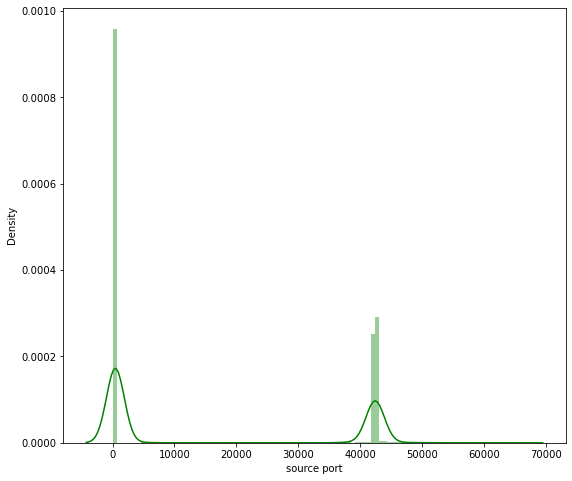

In [16]:
plt.figure(figsize=(9, 8))
sns.distplot(df['source port'], color='g', bins=100, hist_kws={'alpha': 0.4})

C:\ML\fyp\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

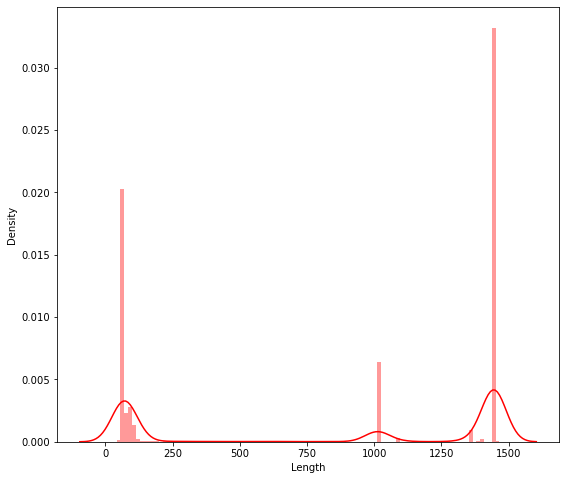

In [17]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Length'], color='r', bins=100, hist_kws={'alpha': 0.4})

In [18]:
list(set(df.dtypes.tolist())) # check the data types

[dtype('int64'), dtype('float64'), dtype('O')]

In [19]:
df_num = df.select_dtypes(include = ['float64', 'int64']) # create a dataframe with only numeric values
df_num.head()

,Protocol,Length,DT,source port,Cumulative Bytes
0,1,167,0.000000,44472.0,167
1,1,167,0.000000,44472.0,334
2,1,167,0.000000,44472.0,501
3,2,42,1.183915,443.0,543
4,2,42,0.000034,443.0,585


array([[<AxesSubplot:title={'center':'Protocol'}>,
        <AxesSubplot:title={'center':'Length'}>],
       [<AxesSubplot:title={'center':'DT'}>,
        <AxesSubplot:title={'center':'source port'}>],
       [<AxesSubplot:title={'center':'Cumulative Bytes'}>,
        <AxesSubplot:>]], dtype=object)

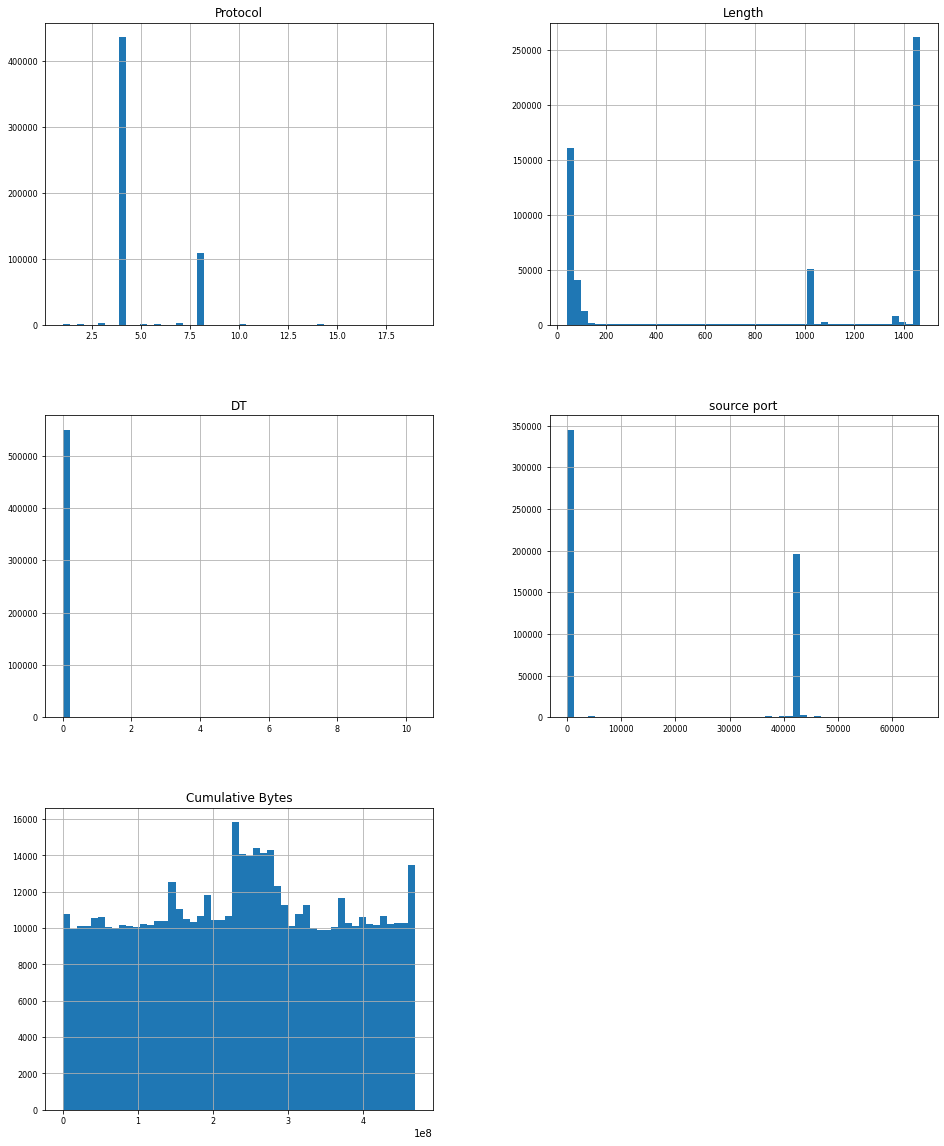

In [20]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8) # plot the histogram

In [21]:
df_num_corr = df_num.corr()['source port'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Source Port:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Source Port:
source port    1.000000
Length        -0.909326
Name: source port, dtype: float64


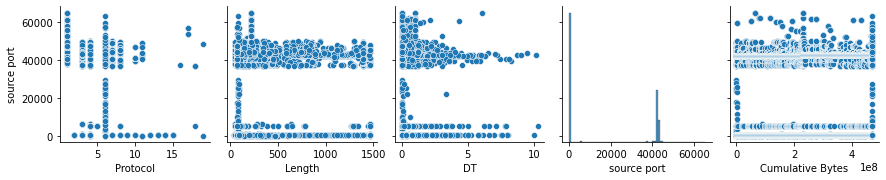

In [22]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['source port'])

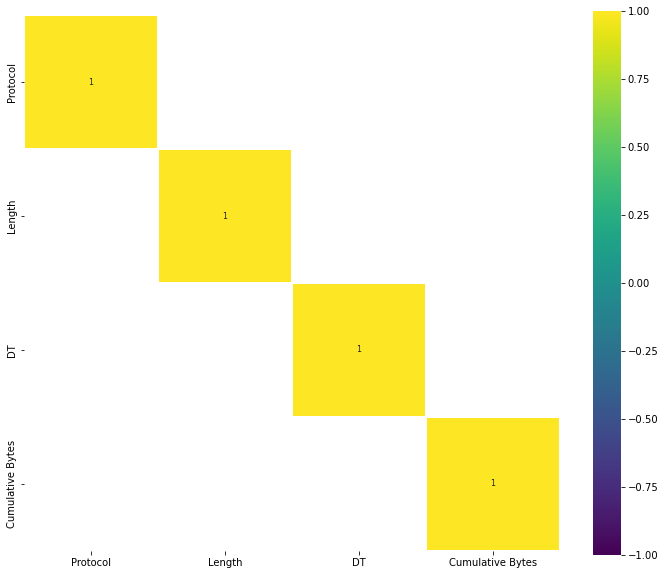

In [23]:
corr = df_num.drop('source port', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Our data is strongly unrelaated

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19')])

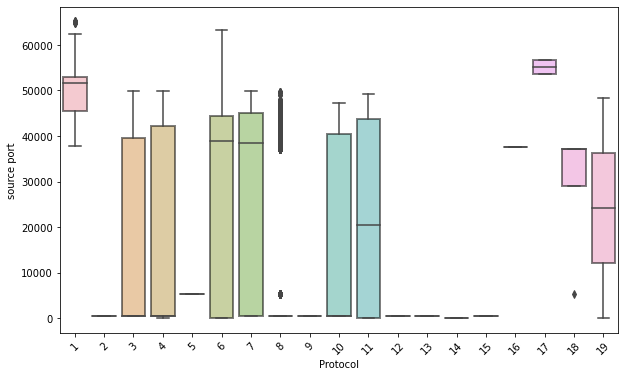

In [24]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Protocol', y='source port', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)


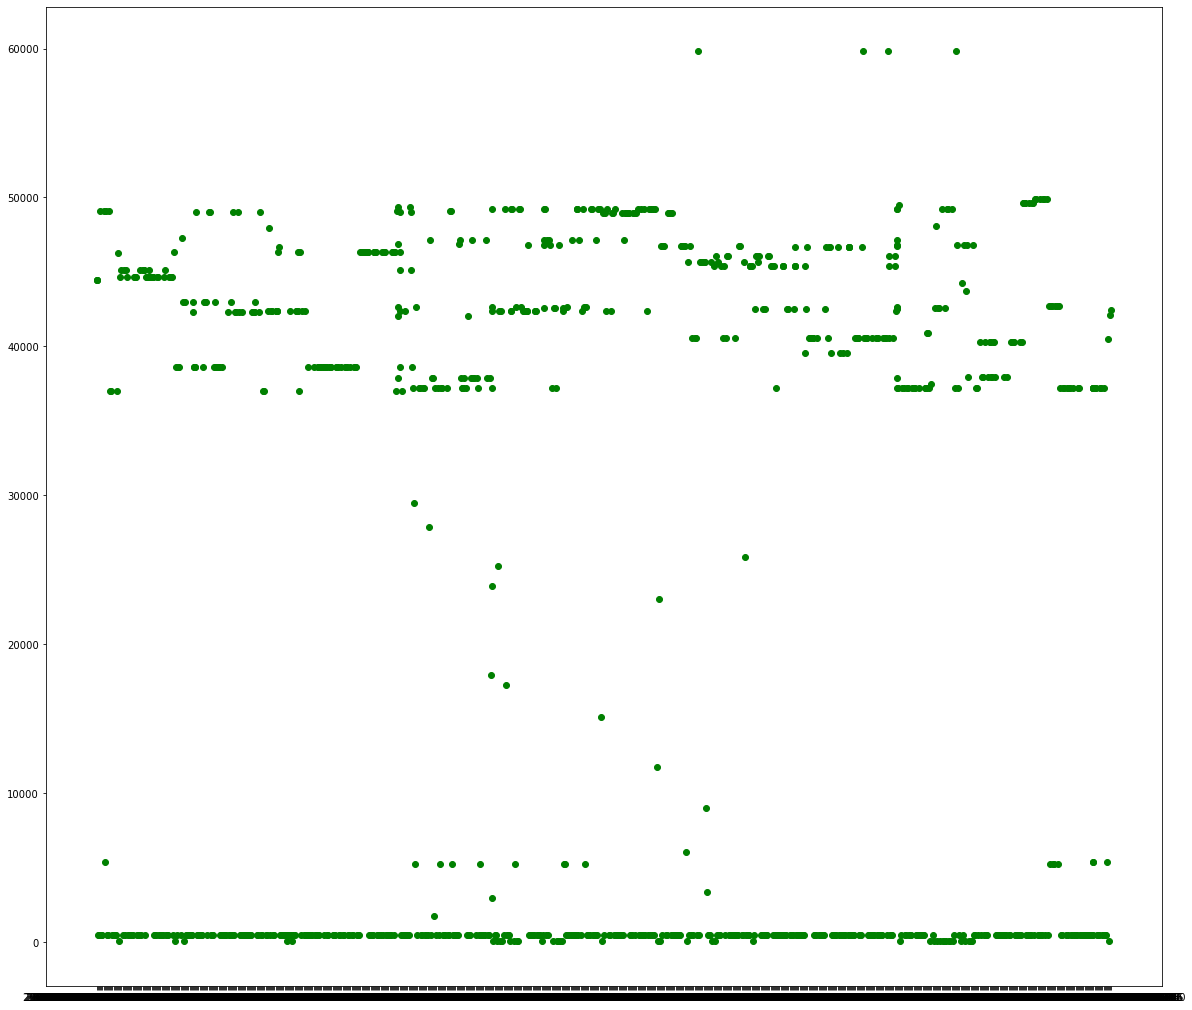

In [30]:
x=dfshort['Time']
y=dfshort['source port']
plt.figure(figsize=(20,20))
plt.gcf().autofmt_xdate() # format the dates on the x-axis
plt.scatter(x,y, color='g') # plot the data
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

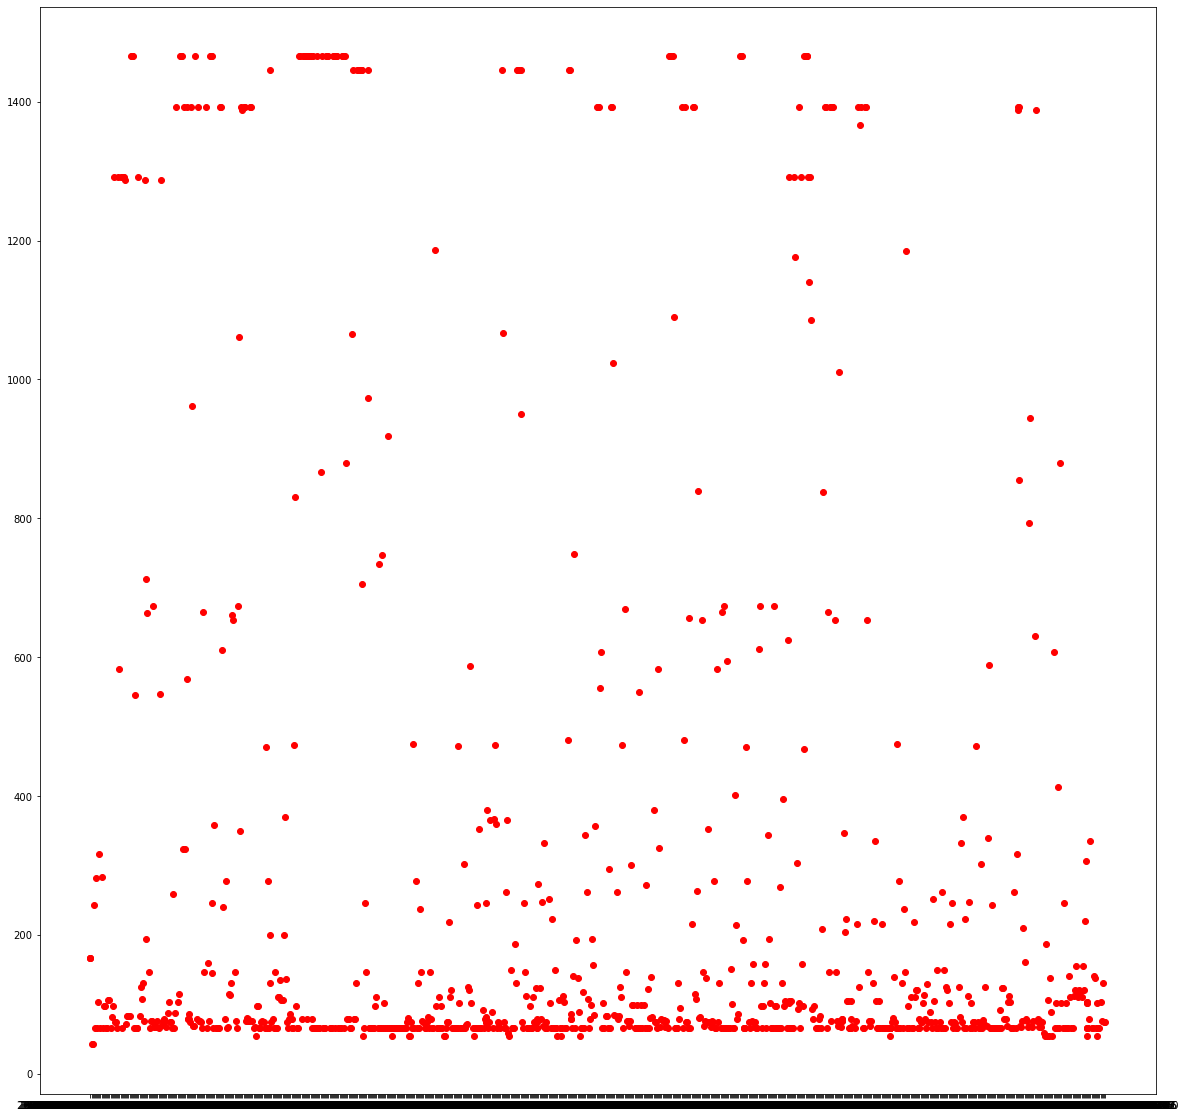

In [28]:
x=dfshort['Time']
y=dfshort['Length']
plt.gcf().autofmt_xdate() # format the dates on the x-axis 
plt.figure(figsize=(20,20))
plt.scatter(x,y ,color='r', ) # plot the data
plt.show()
plt.close()

<AxesSubplot:ylabel='source port'>

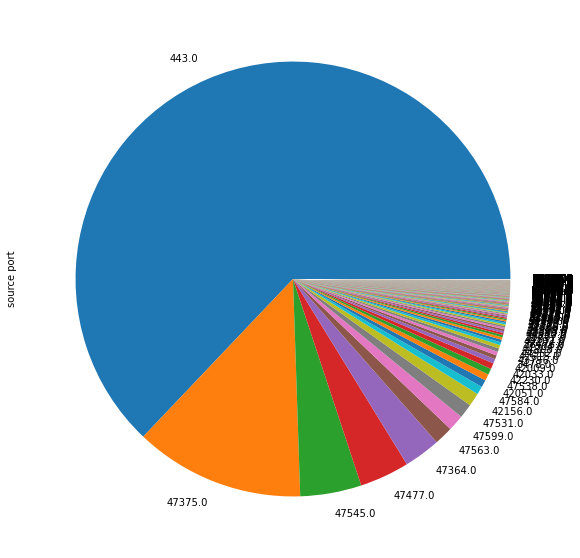

In [5]:
df['source port'].value_counts().plot(kind='pie',figsize=(10,10)) # plot the source port distribution

MANIPULATION

In [40]:
dftemp=df[df['source port']!=443] # drop the rows with source port 443 - target variable
#dftemp['source port'].value_counts().plot(kind='pie') # plot the source port distribution

In [37]:
print(dftemp[dftemp['source port']==42806]) # check the number of rwo with source port
# 42806, so that we can make similar amount of data for the target variable of 443 rows

                              Time  Protocol  Length        DT  source port  \
388192  2021-12-12 20:11:18.979130         4      74  0.219761      42806.0   
388205  2021-12-12 20:11:19.265126         4      66  0.001645      42806.0   
388209  2021-12-12 20:11:19.277079         8     493  0.008512      42806.0   
388216  2021-12-12 20:11:19.282931         4      66  0.000284      42806.0   
388221  2021-12-12 20:11:19.415807         8     130  0.123665      42806.0   
...                            ...       ...     ...       ...          ...   
547883  2021-12-12 20:19:55.744467         4      66  0.000000      42806.0   
547884  2021-12-12 20:19:55.744467         4      66  0.000000      42806.0   
547885  2021-12-12 20:19:55.751515         8     101  0.007048      42806.0   
548624  2021-12-12 20:20:59.730824         4      66  0.805586      42806.0   
548628  2021-12-12 20:20:59.734735         4      66  0.001144      42806.0   

          Absolute Time  Cumulative Bytes  
388192 

In [41]:
df443=df[df['source port']==443] # create a dataframe with 443 rows
df443=df443.head(57443) # take only the first 57443 rows

<AxesSubplot:ylabel='source port'>

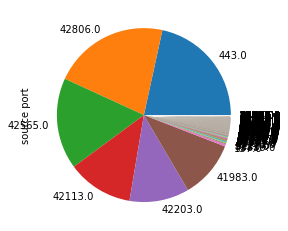

In [42]:
dftemp=dftemp.append(df443,ignore_index = True) # append the dataframes
dftemp['source port'].value_counts().plot(kind='pie') # plot the source port distribution


<AxesSubplot:ylabel='source port'>

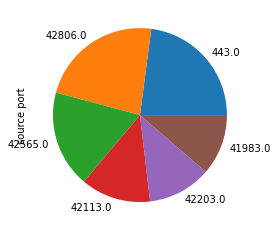

In [43]:

df3=dftemp[dftemp['source port']==443] # create a dataframe with 443 rows
df3=df3.append(dftemp[dftemp['source port']==42806]) # append the dataframes with 42806 rows
df3=df3.append(dftemp[dftemp['source port']==42565]) # append the dataframes with 42565 rows
df3=df3.append(dftemp[dftemp['source port']==42113]) # append the dataframes with 42113 rows
df3=df3.append(dftemp[dftemp['source port']==42203]) # append the dataframes with 42203 rows
df3=df3.append(dftemp[dftemp['source port']==41983]) # append the dataframes with 41983 rows
df=df3.copy() # copy the dataframe into original dataframe
df['source port'].value_counts().plot(kind='pie')


<AxesSubplot:>

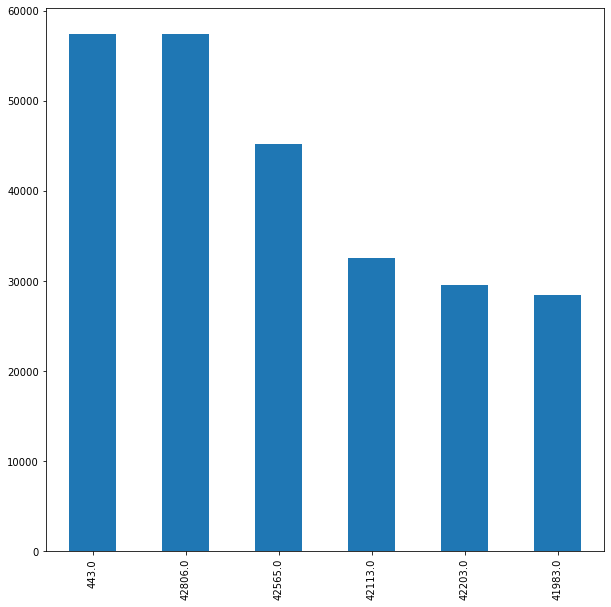

In [41]:
df['source port'].value_counts().plot(kind='bar',figsize=(10,10)) # plot the source port distribution

In [44]:
df.to_csv('Data/clean2_FB.csv',index=False) # save the dataframe as a csv file to be used later